# EDS 296 Homework 1 - Time Series Analysis

### Maxwell Pepperdine

## Load Packages

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import intake
import s3fs
import numpy as np

# **1. Locate Monthly Data for a Historical Simulation Run** 

<a id='data_io'></a> 
### Load and Query the CMIP6 AWS Catalog

To avoid downloading and accessing data from a local machine, I will access the climate data through the Amazon Web Services (AWS) cloud server. 

Data acquisition was guided by the steps laid out in the [Accessing CMIP6 Data via AWS](https://github.com/climate-datalab/CMIP6_AWS) tutorial.

In [2]:
# Open the CMIP6 data catalog, store as a variable
CMIP6_catalog = intake.open_esm_datastore('https://cmip6-pds.s3.amazonaws.com/pangeo-cmip6.json')

In [4]:
# Print the catalog to get a summary of its contents
CMIP6_catalog

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,709
grid_label,10
zstore,522217
dcpp_init_year,60


Once the data is loaded, we can query it using various search terms, listed below:

- _activity_id_: which project do we want? CMIP = historical data, ScenarioMIP = future projections

- _source_id_: which model do we want? 

- _experiment_id_: what experimental configuration do we want? 

- _member_id_: which ensemble member do we want? 

- _table_id_: which part of the Earth system and time resolution do we want? Here we want monthly atmosphere data

- _variable_id_: which climate variable do we want? Here we want precipitation

**List all unique models participating in the "CMIP" activity** ("activity_id=CMIP")

In [5]:
# Search through catalog, find all historical simulations
# ("activity_id=CMIP", "experiment_id=historical")
res = CMIP6_catalog.search(activity_id="CMIP", experiment_id="historical")

# Convert to a data frame
res_df = res.df

# Get unique model names in the set of search results
models = res_df.source_id.unique()

# Print list of model names
print(models)

['GFDL-CM4' 'GFDL-ESM4' 'IPSL-CM6A-LR' 'GISS-E2-1-G' 'CNRM-CM6-1'
 'BCC-CSM2-MR' 'BCC-ESM1' 'CNRM-ESM2-1' 'MIROC6' 'AWI-CM-1-1-MR'
 'MRI-ESM2-0' 'CESM2-WACCM' 'CanESM5' 'CESM2' 'SAM0-UNICON' 'GISS-E2-1-H'
 'UKESM1-0-LL' 'EC-Earth3' 'CanESM5-CanOE' 'INM-CM4-8' 'EC-Earth3-Veg'
 'INM-CM5-0' 'HadGEM3-GC31-LL' 'MPI-ESM-1-2-HAM' 'NESM3' 'CAMS-CSM1-0'
 'MPI-ESM1-2-LR' 'MPI-ESM1-2-HR' 'E3SM-1-0' 'MCM-UA-1-0' 'NorESM2-LM'
 'GISS-E2-1-G-CC' 'FGOALS-g3' 'FGOALS-f3-L' 'MIROC-ES2L' 'KACE-1-0-G'
 'NorCPM1' 'CNRM-CM6-1-HR' 'KIOST-ESM' 'NorESM2-MM' 'ACCESS-CM2'
 'FIO-ESM-2-0' 'ACCESS-ESM1-5' 'CESM2-FV2' 'CESM2-WACCM-FV2' 'GISS-E2-2-H'
 'E3SM-1-1' 'HadGEM3-GC31-MM' 'IITM-ESM' 'CIESM' 'E3SM-1-1-ECA'
 'AWI-ESM-1-1-LR' 'EC-Earth3-Veg-LR' 'TaiESM1' 'CAS-ESM2-0' 'CMCC-CM2-SR5'
 'EC-Earth3-AerChem' 'IPSL-CM5A2-INCA' 'CMCC-CM2-HR4' 'EC-Earth3P-VHR'
 'EC-Earth3-CC' 'CMCC-ESM2' 'MIROC-ES2H' 'ICON-ESM-LR' 'IPSL-CM6A-LR-INCA']


#### Climate model #1: **GFDL-ESM4**

**List all unique ensemble members** associated with the "historical" simulations ("experiment_id=historical") run with GFDL-ESM4

In [6]:
# Search through catalog, find all historical simulations with GFDL-ESM4
# ("activity_id=CMIP", "experiment_id=historical", "source_id=GFDL-ESM4")
res_gfdl = CMIP6_catalog.search(activity_id="CMIP", experiment_id="historical", source_id="GFDL-ESM4")

# Convert to a data frame
res_gfdl_df = res_gfdl.df

# Print all unique ensemble members ("member_id")
members_gfdl = res_gfdl_df.member_id.unique()
print(members_gfdl)

['r2i1p1f1' 'r3i1p1f1' 'r1i1p1f1']


#### Climate model #2: **IPSL-CM6A-LR**

**List all unique ensemble members** associated with the "historical" simulations ("experiment_id=historical") run with IPSL-CM6A-LR

In [7]:
# Search through catalog, find all historical simulations with IPSL-CM6A-LR
# ("activity_id=CMIP", "experiment_id=historical", "source_id=IPSL-CM6A-LR")
res_ipsl = CMIP6_catalog.search(activity_id="CMIP", experiment_id="historical", source_id="IPSL-CM6A-LR")

# Convert to a data frame
res_ipsl_df = res_ipsl.df

# Print all unique ensemble members ("member_id")
members_ipsl = res_ipsl_df.member_id.unique()
print(members_ipsl)

['r3i1p1f1' 'r4i1p1f1' 'r8i1p1f1' 'r6i1p1f1' 'r5i1p1f1' 'r9i1p1f1'
 'r15i1p1f1' 'r14i1p1f1' 'r18i1p1f1' 'r19i1p1f1' 'r16i1p1f1' 'r17i1p1f1'
 'r27i1p1f1' 'r2i1p1f1' 'r28i1p1f1' 'r29i1p1f1' 'r30i1p1f1' 'r31i1p1f1'
 'r7i1p1f1' 'r26i1p1f1' 'r25i1p1f1' 'r21i1p1f1' 'r20i1p1f1' 'r1i1p1f1'
 'r24i1p1f1' 'r22i1p1f1' 'r23i1p1f1' 'r11i1p1f1' 'r10i1p1f1' 'r12i1p1f1'
 'r13i1p1f1' 'r32i1p1f1']


# **2. Download the Data (Find a Specific File)**

We'll be downloading precipitation (`pr`) data from the following two climate models:

- `GFDL-ESM4`
- `IPSL-CM6A-LR`

For each climate model, we need:

- Historical observations 
- Corresponding future projections for two emission scenarios (we'll pick `ssp126` & `ssp370`)

**Characteristics of these files** (corresponding fields in the CMIP6 catalog are in parentheses):
- _Variable ("variable_id")_: This is a precipitation, or "pr", variable.
- _Realm ("table_id")_: Surface air temperature is generated by the atmosphere component of a climate model ("A"), and the information in this particular file is averaged monthly ("mon").
- _Model ("source_id")_: The name of the model is "GFDL-ESM4"
- _Experiment ("experiment_id")_: The name of the model experiment being run. The file above is a _historical_ simulation: since we're also interested in the future projection information, we'll further specify that we'd also like the associated SSPs below.
- _Ensemble member ("member_id")_: The name of this ensemble member is "r1i1p1f1".

The workflow used to download the data was also guided by the [Accessing CMIP6 Data via AWS](https://github.com/climate-datalab/CMIP6_AWS) tutorial.

#### Climate model #1: **GFDL-ESM4**

In [8]:
# Specify search terms to query catalog for GFDL-ESM4 data
# activity_id: which project do you want? CMIP = historical data, ScenarioMIP = future projections
activity_ids = ['ScenarioMIP', 'CMIP']

# source_id: which model do you want? 
source_id = ['GFDL-ESM4']

# experiment_id: what experimental configuration do you want? Here we want historical and ssp126 and ssp370
experiment_ids = ['historical', 'ssp126', 'ssp370']

# member_id: which ensemble member do you want? Here we want r1i1p1f1
member_id = 'r1i1p1f1'

# table_id: which part of the Earth system and time resolution do you want? Here we want monthly atmosphere data
table_id = 'Amon'

# variable_id: which climate variable do you want? Here we want precipitation
variable_id = 'pr'

In [9]:
# Search through catalog, store results in "res" variable
res_gfdl = CMIP6_catalog.search(activity_id=activity_ids, source_id=source_id, experiment_id=experiment_ids, 
                     member_id=member_id, table_id=table_id, variable_id=variable_id)

# Display data frame associated with results
display(res_gfdl.df)

# Extract data for the historical period, store as a separate xarray Dataset
hist_data_gfdl = xr.open_zarr(res_gfdl.df['zstore'][2], storage_options={'anon': True})

# Extract data for each SSP 
future_data_ssp126_gfdl = xr.open_zarr(res_gfdl.df['zstore'][1], storage_options={'anon': True})
future_data_ssp370_gfdl = xr.open_zarr(res_gfdl.df['zstore'][0], storage_options={'anon': True})

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp370,r1i1p1f1,Amon,pr,gr1,s3://cmip6-pds/CMIP6/ScenarioMIP/NOAA-GFDL/GFD...,NaN,20180701
1,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp126,r1i1p1f1,Amon,pr,gr1,s3://cmip6-pds/CMIP6/ScenarioMIP/NOAA-GFDL/GFD...,NaN,20180701
2,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r1i1p1f1,Amon,pr,gr1,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/...,NaN,20190726


#### Climate model #2: **IPSL-CM6A-LR**

In [10]:
# Specify search terms to query catalog for IPSL-CM6A data
# activity_id: which project do you want? CMIP = historical data, ScenarioMIP = future projections
activity_ids = ['ScenarioMIP', 'CMIP']

# source_id: which model do you want? 
source_id = ['IPSL-CM6A-LR']

# experiment_id: what experimental configuration do you want? Here we want historical and ssp126 and ssp370
experiment_ids = ['historical', 'ssp126', 'ssp370']

# member_id: which ensemble member do you want? Here we want r1i1p1f1
member_id = 'r1i1p1f1'

# table_id: which part of the Earth system and time resolution do you want? Here we want monthly atmosphere data
table_id = 'Amon'

# variable_id: which climate variable do you want? Here we want precipitation
variable_id = 'pr'

In [11]:
# Search through catalog, store results in "res" variable
res_ipsl = CMIP6_catalog.search(activity_id=activity_ids, source_id=source_id, experiment_id=experiment_ids, 
                     member_id=member_id, table_id=table_id, variable_id=variable_id)

# Display data frame associated with results
display(res_ipsl.df)

# Extract data for the historical period, store as a separate xarray Dataset
hist_data_ipsl = xr.open_zarr(res_ipsl.df['zstore'][0], storage_options={'anon': True})

# Extract data for each SSP 
future_data_ssp126_ipsl = xr.open_zarr(res_ipsl.df['zstore'][2], storage_options={'anon': True})
future_data_ssp370_ipsl = xr.open_zarr(res_ipsl.df['zstore'][1], storage_options={'anon': True})

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,IPSL,IPSL-CM6A-LR,historical,r1i1p1f1,Amon,pr,gr,s3://cmip6-pds/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/hi...,NaN,20180803
1,ScenarioMIP,IPSL,IPSL-CM6A-LR,ssp370,r1i1p1f1,Amon,pr,gr,s3://cmip6-pds/CMIP6/ScenarioMIP/IPSL/IPSL-CM6...,NaN,20190119
2,ScenarioMIP,IPSL,IPSL-CM6A-LR,ssp126,r1i1p1f1,Amon,pr,gr,s3://cmip6-pds/CMIP6/ScenarioMIP/IPSL/IPSL-CM6...,NaN,20190903


# **3. Focus on a Specific Region**

This section will focus on a specific region of the world to analyze and plot our data. It will first provide an overview of the selected region, and then generate annually averaged, area-weighted, regionally averaged time series for this region. 

For this part of the assignment, I will be focusing on the **Zambezi Region of Namibia**. 

## a) Description of Region

The Zambezi Region is one of Namibia's fourteen regions, situated in the northeastern portion of the country in the Namibian panhandle bordering Botswana, Angola, and Zambia. The climate of Zambezi is characterized as tropical with significant fluctuations in temperature and precipitation throughut the year. 

**Precipitation:**
A majority of the country's annual rainfall is concentrated during the wet season months (November - April). January and February tend to recieve a significant amount of rainfall for the region, with precipitation usually totalling somewhere between 180 mm - 250 mm in each month. In March, precipitation starts to decrease. The dry season for the region runs from May - October, and this time period sees significantly less rainfall each year. During these dry months, the Zambezi Region experiences essentially little to no rainfall with about 0 mm - 1 mm each month. 

**Temperature:**
Temperature also fluctuates fairly significantly throughout the year in Zambezi, following similar trends to precipitation across wet and dry season months. During wet season months, temperatures are warmer with and tend to range anywhere from 16°C (61°F) to 37°C (98°F). Transitioning to the dry season, temperatures start to drop in April and May, reacing annual lows usually between June-July where temperatures can dip as low as 1°C (34°F). As the year progresses into late winter and early spring towards the end of the dry season, temperatures increase rapidly again with annual maximums usually occuring in October, and reaching temperatures up to 40°C (105°F). 

**Climate Change Impacts:**
In a region that already experiences drastic fluctuations in temperature and precipitation throughout each year, I might expect these patterns to become even more pronounced under a changing climate. I would expect overall rainfall to decrease, with an increase in extreme precipitation events like atmospheric rivers. This would likely result in more frequent drying of river and stream networks, with and more frequent flooding events. Following global trends, I would expect average temperatures to also increase throughout the Zambezi Region. 

**A reasonable lat/lon bounds for the Zambezi Region is:**
- Latitude range of 18.5°S to 17.4°S
- Longitude range of 23°E to 25°E

*Information on Zambezi's climate was sourced from [Nomad Season](https://nomadseason.com/climate/namibia/zambezi.html).*

## b) Read in `pr` Datasets and Create Annually Averaged, Area Weighted, Regionally Averaged Time Series for the Zambezi Region

Because we're working with two models and two scenarios, this should result in four different time series plots. We'll make one plot for each climate model that shows the time series for `ssp126` and `ssp370` plotted together. The workflow and code used to achieve the annual/regional averaging, area weighting, and plotting was guided by the Climate Data Lab's [Time Series Plots](https://github.com/climate-datalab/Time-Series-Plots) tutorial. 

In [12]:
## Read in the data

# GFDL-ESM4 data 
hist_data_gfdl = hist_data_gfdl
future_data_ssp126_gfdl = future_data_ssp126_gfdl
future_data_ssp370_gfdl = future_data_ssp370_gfdl

# IPSL-CM6A-LR data
hist_data_ipsl = hist_data_ipsl

# Extract data for each SSP 
future_data_ssp126_ipsl = future_data_ssp126_ipsl
future_data_ssp370_ipsl = future_data_ssp370_ipsl

First, we'll *also* concatenate the historical and SSP information into a single `xarray` object, to make the plotting simpler:

In [13]:
# GFDL-ESM4 data
gfdl_data_ssp126 = xr.concat([hist_data_gfdl, future_data_ssp126_gfdl], dim="time")
gfdl_data_ssp370 = xr.concat([hist_data_gfdl, future_data_ssp370_gfdl], dim="time")

# IPSL-CM6A-LR data 
ipsl_data_ssp126 = xr.concat([hist_data_ipsl, future_data_ssp126_ipsl], dim="time")
ipsl_data_ssp370 = xr.concat([hist_data_ipsl, future_data_ssp370_ipsl], dim="time")

In [14]:
# examine the time format for both datasets 
print(gfdl_data_ssp126.time)
print(ipsl_data_ssp126.time)

<xarray.DataArray 'time' (time: 3012)>
array([cftime.DatetimeNoLeap(1850, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 2, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 3, 16, 12, 0, 0, 0, has_year_zero=True),
       ...,
       cftime.DatetimeNoLeap(2100, 10, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2100, 11, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2100, 12, 16, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    axis:           T
    bounds:         time_bnds
    calendar_type:  noleap
    description:    Temporal mean
    long_name:      time
    standard_name:  time
<xarray.DataArray 'time' (time: 3012)>
array(['1850-01-16T12:00:00.000000000', '1850-02-15T00:00:00.000000000',
       '1850-03-16T12:00:00.000000000', ..., '2100-10-16T12:00:00.000000000',
       '2100-11-16T00:

It looks like the IPSL model data is already in a `dtype` of `datetime64`; however, we'll need to change the format of the GFDL data to `datetime64` to make plotting easier with `Matplotlib`

In [15]:
# convert the time variable to datetime format in the GFDL data
time = gfdl_data_ssp126.time.astype('datetime64[ns]')
print(time)

<xarray.DataArray 'time' (time: 3012)>
array(['1850-01-16T12:00:00.000000000', '1850-02-15T00:00:00.000000000',
       '1850-03-16T12:00:00.000000000', ...,
       '2100-10-16T12:00:00.000000000', '2100-11-16T00:00:00.000000000',
       '2100-12-16T12:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    axis:           T
    bounds:         time_bnds
    calendar_type:  noleap
    description:    Temporal mean
    long_name:      time
    standard_name:  time


In [16]:
# convert the time variable to datetime format in the GFDL data
time = gfdl_data_ssp370.time.astype('datetime64[ns]')
print(time)

<xarray.DataArray 'time' (time: 3012)>
array(['1850-01-16T12:00:00.000000000', '1850-02-15T00:00:00.000000000',
       '1850-03-16T12:00:00.000000000', ...,
       '2100-10-16T12:00:00.000000000', '2100-11-16T00:00:00.000000000',
       '2100-12-16T12:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    axis:           T
    bounds:         time_bnds
    calendar_type:  noleap
    description:    Temporal mean
    long_name:      time
    standard_name:  time


### **GFDL-ESM4 data**

First, we'll do the area weighting, calculation of the annual and regional average, and plotting with the `GFDL-ESM4` data for both emission scenarios: `ssp126` & `ssp370`.

#### **ssp126**

#### Weight the grid cells

In [17]:
# Define function to generate area weights
def weights(dat):
    # Calculate weighting factor = cosine of latitude
    coslat = np.cos(np.deg2rad(dat.lat))
    weight_factor = coslat / coslat.mean(dim='lat')
    
    # Weight all points by the weighting factor
    computed_weight = dat * weight_factor
    
    # Return the set of weights: this has dimension equal to that of the input data
    return computed_weight

In [18]:
# apply the function to the gfdl-esm4 ssp126 data
gfdl_data_ssp126_weighted = weights(gfdl_data_ssp126)

#### Calculate the Regional Average

In [19]:
# Define min/max bounds for region of interest (Zambezi Region)
lat_min, lat_max = -18.5, -17.4
lon_min, lon_max = 23, 25

# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
pr_ZAM_lat_GF_ssp126 = (gfdl_data_ssp126_weighted.lat >= lat_min) & (gfdl_data_ssp126_weighted.lat <= lat_max)
pr_ZAM_lon_GF_ssp126 = (gfdl_data_ssp126_weighted.lon >= lon_min) & (gfdl_data_ssp126_weighted.lon <= lon_max)

# Find points where the mask value is True, drop all other points
pr_ZAM_GF_ssp126 = gfdl_data_ssp126_weighted.where(pr_ZAM_lat_GF_ssp126 & pr_ZAM_lon_GF_ssp126, drop=True)

# Average over lat, lon dimensions to get a time series
pr_ZAM_GF_ssp126 = pr_ZAM_GF_ssp126.mean(dim=["lat", "lon"])

#### Average the Data Annually

In [20]:
pr_ZAM_annual_avg_GF_ssp126 = pr_ZAM_GF_ssp126.groupby('time.year').mean()

# print(pr_ZAM_annual_avg_GF_ssp126)

#### **ssp370**

#### Weight the grid cells

In [21]:
# apply the weight function to the gfdl-esm4 ssp370 data
gfdl_data_ssp370_weighted = weights(gfdl_data_ssp370)

#### Calculate the Regional Average

In [22]:
# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
pr_ZAM_lat_GF_ssp370 = (gfdl_data_ssp370_weighted.lat >= lat_min) & (gfdl_data_ssp370_weighted.lat <= lat_max)
pr_ZAM_lon_GF_ssp370 = (gfdl_data_ssp370_weighted.lon >= lon_min) & (gfdl_data_ssp370_weighted.lon <= lon_max)

# Find points where the mask value is True, drop all other points
pr_ZAM_GF_ssp370 = gfdl_data_ssp370_weighted.where(pr_ZAM_lat_GF_ssp370 & pr_ZAM_lon_GF_ssp370, drop=True)

# Average over lat, lon dimensions to get a time series
pr_ZAM_GF_ssp370 = pr_ZAM_GF_ssp370.mean(dim=["lat", "lon"])

#### Average the Data Annually

In [23]:
pr_ZAM_annual_avg_GF_ssp370 = pr_ZAM_GF_ssp370.groupby('time.year').mean()

#### Plot the `GFDL-ESM4` time series for both emission scenarios!

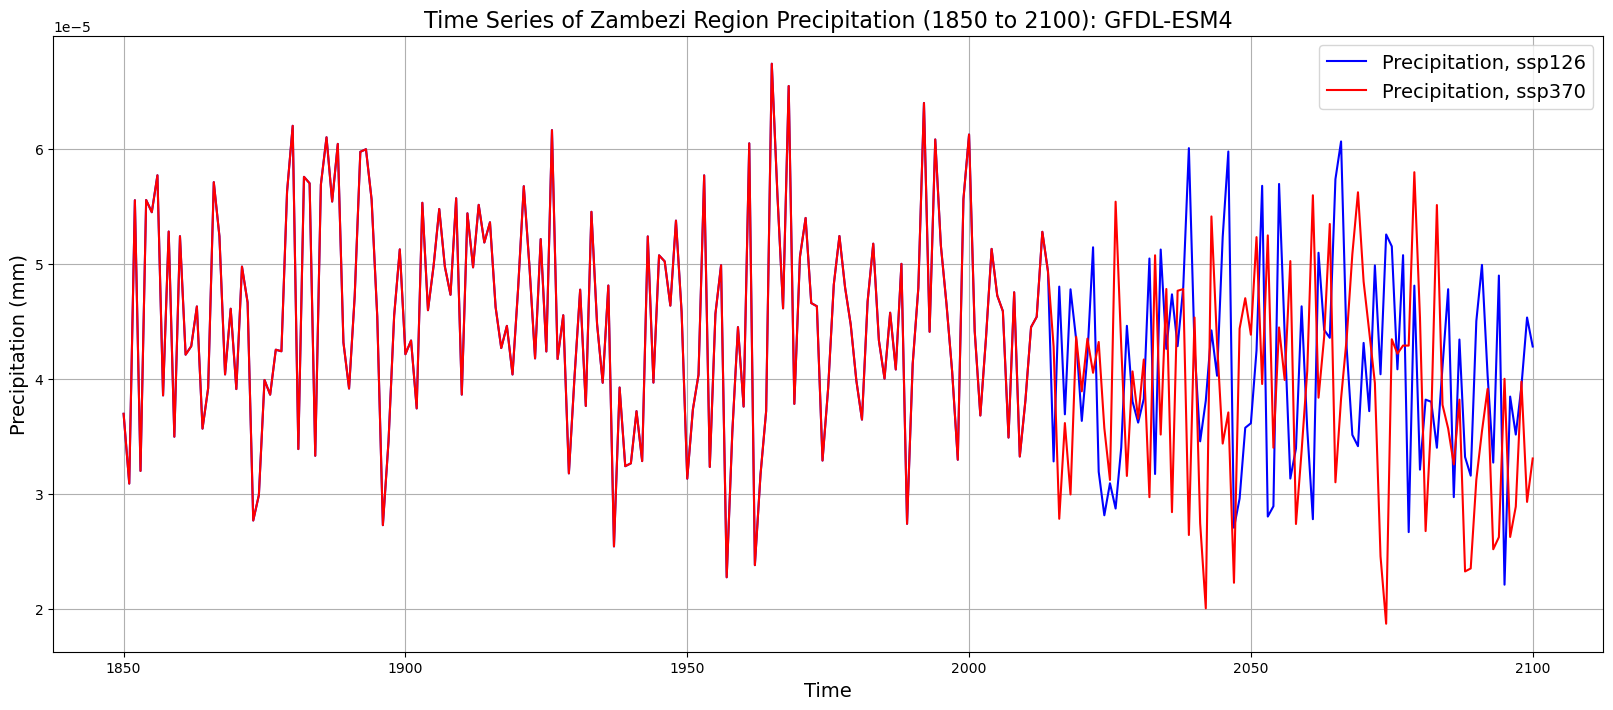

In [24]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(pr_ZAM_annual_avg_GF_ssp126.year, pr_ZAM_annual_avg_GF_ssp126.pr, label='Precipitation, ssp126', color='blue')
ax.plot(pr_ZAM_annual_avg_GF_ssp370.year, pr_ZAM_annual_avg_GF_ssp370.pr, label='Precipitation, ssp370', color='red')
ax.set_title("Time Series of Zambezi Region Precipitation (1850 to 2100): GFDL-ESM4", fontsize = 16)
ax.set_xlabel("Time", fontsize = 14)
ax.set_ylabel("Precipitation (mm)", fontsize = 14)
ax.legend(fontsize = 14)
ax.grid()
plt.show()

### **IPSL-CM6A-LR**

Now that we plotted our time series' for precipitation in the Zambezi Region over historical and future periods using ssp126 and ssp370 emission scenarios with the `GFDL-ESM4` climate model, we'll repeat this using data from the `IPSL-CM6A-LR` climate model.

#### **ssp126**

#### Weight the grid cells

In [25]:
# apply the weighting function to the IPSL-CM6A-LR data
ipsl_data_ssp126_weighted = weights(ipsl_data_ssp126)

#### Calculate the Regional Average

In [26]:
# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
pr_ZAM_lat_IP_ssp126 = (ipsl_data_ssp126_weighted.lat >= lat_min) & (ipsl_data_ssp126_weighted.lat <= lat_max)
pr_ZAM_lon_IP_ssp126 = (ipsl_data_ssp126_weighted.lon >= lon_min) & (ipsl_data_ssp126_weighted.lon <= lon_max)

# Find points where the mask value is True, drop all other points
pr_ZAM_IP_ssp126 = ipsl_data_ssp126_weighted.where(pr_ZAM_lat_IP_ssp126 & pr_ZAM_lon_IP_ssp126, drop=True)

# Average over lat, lon dimensions to get a time series
pr_ZAM_IP_ssp126 = pr_ZAM_IP_ssp126.mean(dim=["lat", "lon"])

#### Average the Data Annually

In [27]:
pr_ZAM_annual_avg_IP_ssp126 = pr_ZAM_IP_ssp126.groupby('time.year').mean()

# print(pr_ZAM_annual_avg_IP_ssp126)

#### **ssp370**

#### Weight the grid cells

In [28]:
# apply the weighting function to the IPSL-CM6A-LR ssp370 data
ipsl_data_ssp370_weighted = weights(ipsl_data_ssp370)

#### Calculate the Regional Average

In [29]:
# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
pr_ZAM_lat_IP_ssp370 = (ipsl_data_ssp370_weighted.lat >= lat_min) & (ipsl_data_ssp370_weighted.lat <= lat_max)
pr_ZAM_lon_IP_ssp370 = (ipsl_data_ssp370_weighted.lon >= lon_min) & (ipsl_data_ssp370_weighted.lon <= lon_max)

# Find points where the mask value is True, drop all other points
pr_ZAM_IP_ssp370 = ipsl_data_ssp370_weighted.where(pr_ZAM_lat_IP_ssp370 & pr_ZAM_lon_IP_ssp370, drop=True)

# Average over lat, lon dimensions to get a time series
pr_ZAM_IP_ssp370 = pr_ZAM_IP_ssp370.mean(dim=["lat", "lon"])

#### Average the Data Annually

In [30]:
pr_ZAM_annual_avg_IP_ssp370 = pr_ZAM_IP_ssp370.groupby('time.year').mean()

# print(pr_ZAM_annual_avg_IP_ssp370)

#### Plot the time series!

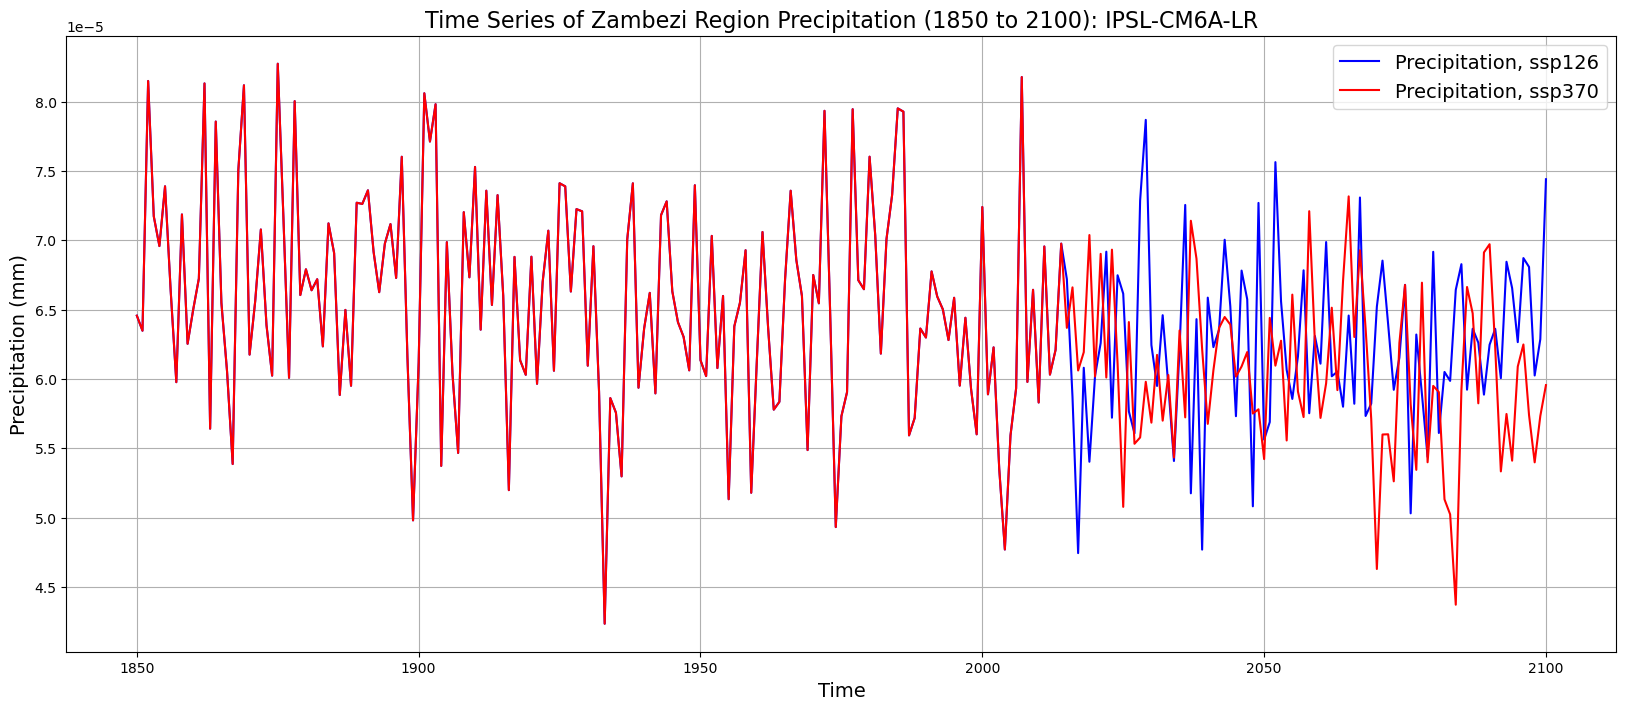

In [31]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(pr_ZAM_annual_avg_IP_ssp126.year, pr_ZAM_annual_avg_IP_ssp126.pr, label='Precipitation, ssp126', color='blue')
ax.plot(pr_ZAM_annual_avg_IP_ssp370.year, pr_ZAM_annual_avg_IP_ssp370.pr, label='Precipitation, ssp370', color='red')
ax.set_title("Time Series of Zambezi Region Precipitation (1850 to 2100): IPSL-CM6A-LR", fontsize = 16)
ax.set_xlabel("Time", fontsize = 14)
ax.set_ylabel("Precipitation (mm)", fontsize = 14)
ax.legend(fontsize = 14)
ax.grid()
plt.show()

# **4. Plot each regional time series with a trend line**

This section will plot each regional time series again, but with a trend line included and broken up into the following two periods. 
- Historical (1850-2015)
- Historical plus future (1850-2100)

To make each trend line more clear, the emission scenarios and time periods are plotted separately to generate 6 total plots: one for the historical period of each climate model, and two for each historical plus future period for `ssp126` and `ssp370` emission scenarios for each climate model. 

### **a) GFDL-ESM4**

#### **i) Historical**

#### Select time periods of interest

In [32]:
# historical (1850-2015)
pr_ZAM_annual_avg_GF_historical = pr_ZAM_annual_avg_GF_ssp126.sel(year=slice('1850-01-01', '2015-12-31'))

#### Calculate line of best fit

In [33]:
#### historical (1850-2015)

# Calculate best-fit parameters for the linear polynomial fit of temperature to year
x_GF_historical = np.polyfit(pr_ZAM_annual_avg_GF_historical.year, 
                             pr_ZAM_annual_avg_GF_historical.pr, 1)

# Generate a polynomial object using those best-fit parameters
trend_line_GF_historical = np.poly1d(x_GF_historical)  

#### Plot!

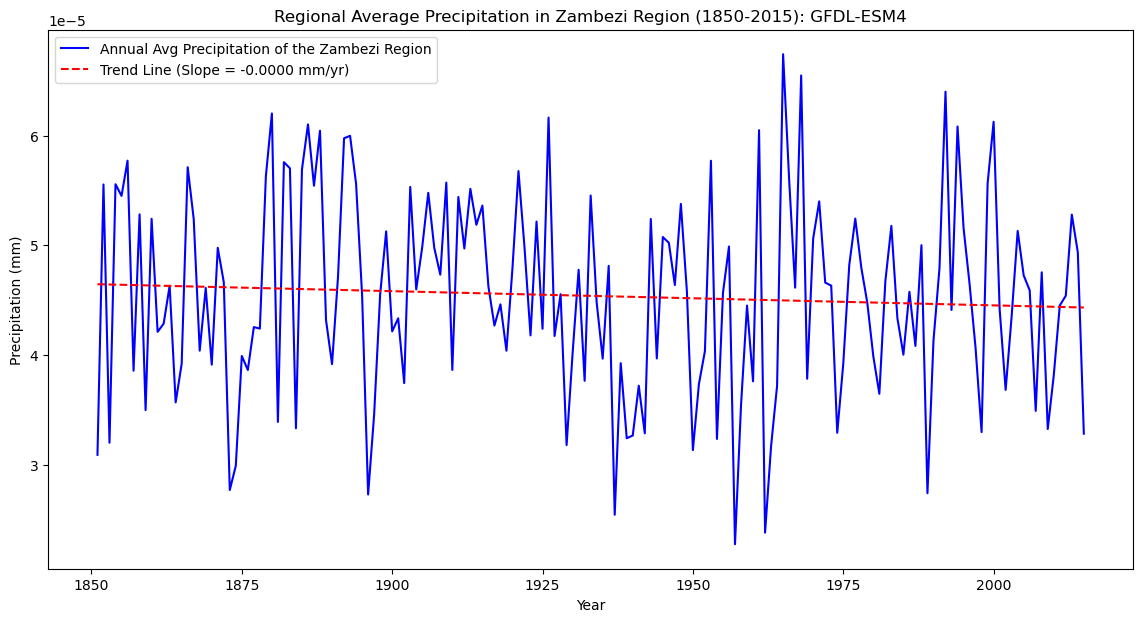

In [34]:
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(pr_ZAM_annual_avg_GF_historical.year, pr_ZAM_annual_avg_GF_historical.pr, 
        label= 'Annual Avg Precipitation of the Zambezi Region', color='blue')
ax.plot(pr_ZAM_annual_avg_GF_historical.year, trend_line_GF_historical(pr_ZAM_annual_avg_GF_historical.year), 
        color='red', linestyle='--', label=f'Trend Line (Slope = {x_GF_historical[0]:.4f} mm/yr)')
ax.set_title('Regional Average Precipitation in Zambezi Region (1850-2015): GFDL-ESM4')
ax.set_xlabel('Year')
ax.set_ylabel('Precipitation (mm)')
ax.legend()
plt.show() 

#### **ii) Historical plus future (1850-2100)**

#### Calculate line of best fit

In [35]:
#### ssp126

# Calculate best-fit parameters for the linear polynomial fit of temperature to year
x_GF_ssp126 = np.polyfit(pr_ZAM_annual_avg_GF_ssp126.year, 
                         pr_ZAM_annual_avg_GF_ssp126.pr, 1)

# Generate a polynomial object using those best-fit parameters
trend_line_GF_ssp126 = np.poly1d(x_GF_ssp126)  

#### ssp370

# Calculate best-fit parameters for the linear polynomial fit of temperature to year
x_GF_ssp370 = np.polyfit(pr_ZAM_annual_avg_GF_ssp370.year, 
                         pr_ZAM_annual_avg_GF_ssp370.pr, 1)

# Generate a polynomial object using those best-fit parameters
trend_line_GF_ssp370 = np.poly1d(x_GF_ssp370)  

#### Plot!

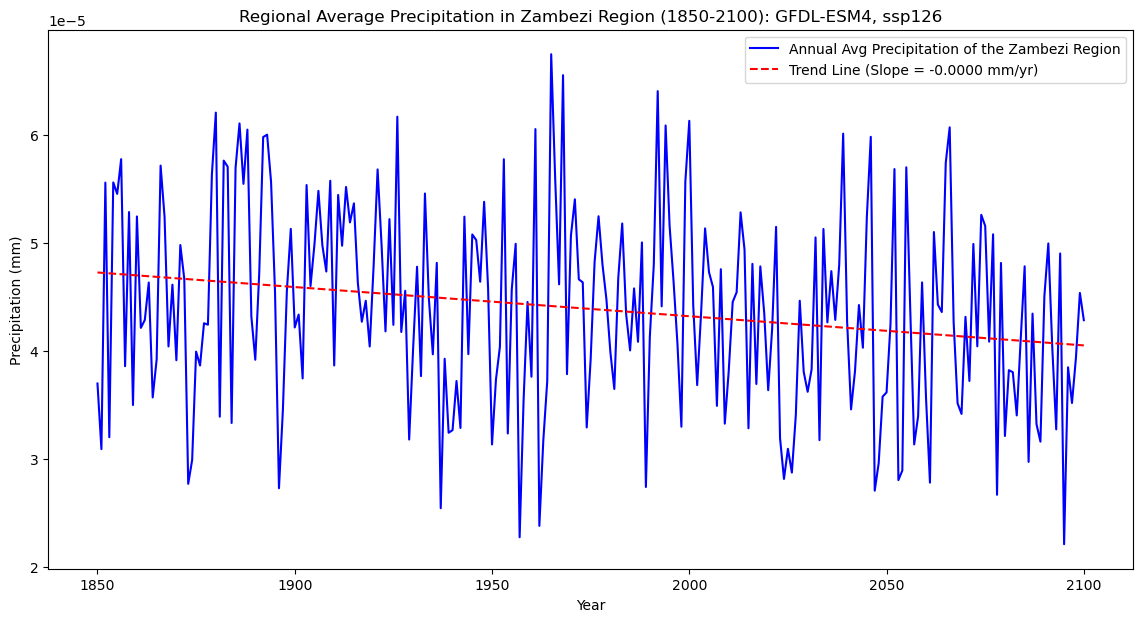

In [36]:
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(pr_ZAM_annual_avg_GF_ssp126.year, pr_ZAM_annual_avg_GF_ssp126.pr, 
        label= 'Annual Avg Precipitation of the Zambezi Region', color='blue')
ax.plot(pr_ZAM_annual_avg_GF_ssp126.year, trend_line_GF_ssp126(pr_ZAM_annual_avg_GF_ssp126.year), 
        color='red', linestyle='--', label=f'Trend Line (Slope = {x_GF_ssp126[0]:.4f} mm/yr)')
ax.set_title('Regional Average Precipitation in Zambezi Region (1850-2100): GFDL-ESM4, ssp126')
ax.set_xlabel('Year')
ax.set_ylabel('Precipitation (mm)')
ax.legend()
plt.show() 

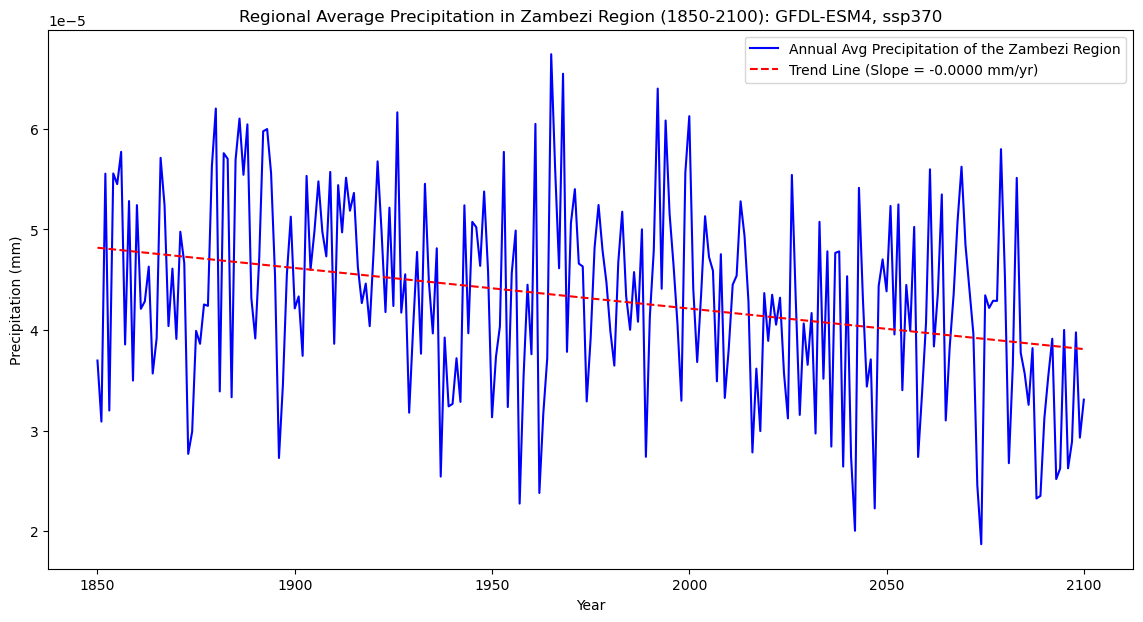

In [37]:
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(pr_ZAM_annual_avg_GF_ssp370.year, pr_ZAM_annual_avg_GF_ssp370.pr, 
        label= 'Annual Avg Precipitation of the Zambezi Region', color='blue')
ax.plot(pr_ZAM_annual_avg_GF_ssp370.year, trend_line_GF_ssp370(pr_ZAM_annual_avg_GF_ssp370.year), 
        color='red', linestyle='--', label=f'Trend Line (Slope = {x_GF_ssp370[0]:.4f} mm/yr)')
ax.set_title('Regional Average Precipitation in Zambezi Region (1850-2100): GFDL-ESM4, ssp370')
ax.set_xlabel('Year')
ax.set_ylabel('Precipitation (mm)')
ax.legend()
plt.show() 

### **b) IPSL-CM6A-LR**

#### **i) Historical**

#### Select time periods of interest

In [38]:
# historical (1850-2015)
pr_ZAM_annual_avg_IP_historical = pr_ZAM_annual_avg_IP_ssp126.sel(year=slice('1850-01-01', '2015-12-31'))

#### Calculate line of best fit

In [39]:
#### historical (1850-2015)

# Calculate best-fit parameters for the linear polynomial fit of temperature to year
x_IP_historical = np.polyfit(pr_ZAM_annual_avg_IP_historical.year, 
                             pr_ZAM_annual_avg_IP_historical.pr, 1)

# Generate a polynomial object using those best-fit parameters
trend_line_IP_historical = np.poly1d(x_IP_historical)  

#### Plot!

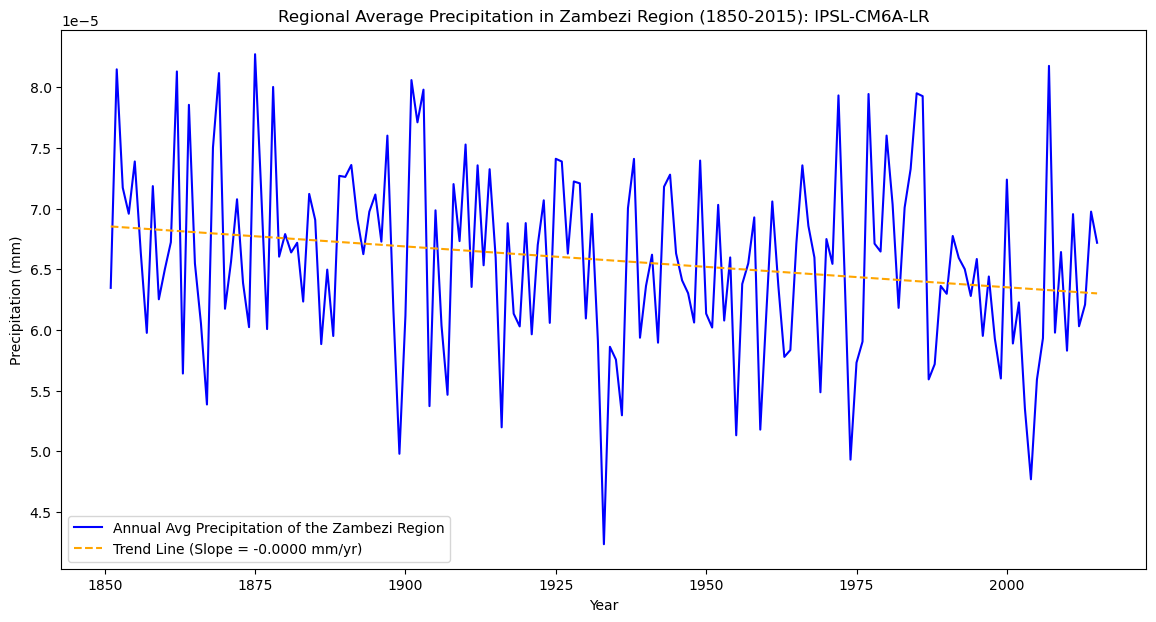

In [40]:
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(pr_ZAM_annual_avg_IP_historical.year, pr_ZAM_annual_avg_IP_historical.pr, 
        label= 'Annual Avg Precipitation of the Zambezi Region', color='blue')
ax.plot(pr_ZAM_annual_avg_IP_historical.year, trend_line_IP_historical(pr_ZAM_annual_avg_IP_historical.year), 
        color='orange', linestyle='--', label=f'Trend Line (Slope = {x_GF_historical[0]:.4f} mm/yr)')
ax.set_title('Regional Average Precipitation in Zambezi Region (1850-2015): IPSL-CM6A-LR')
ax.set_xlabel('Year')
ax.set_ylabel('Precipitation (mm)')
ax.legend()
plt.show() 

#### **ii) Historical plus future (1850-2100)**

#### Calculate line of best fit

In [41]:
#### ssp126

# Calculate best-fit parameters for the linear polynomial fit of temperature to year
x_IP_ssp126 = np.polyfit(pr_ZAM_annual_avg_IP_ssp126.year, 
                         pr_ZAM_annual_avg_IP_ssp126.pr, 1)

# Generate a polynomial object using those best-fit parameters
trend_line_IP_ssp126 = np.poly1d(x_IP_ssp126)  

#### ssp370

# Calculate best-fit parameters for the linear polynomial fit of temperature to year
x_IP_ssp370 = np.polyfit(pr_ZAM_annual_avg_IP_ssp370.year, 
                         pr_ZAM_annual_avg_IP_ssp370.pr, 1)

# Generate a polynomial object using those best-fit parameters
trend_line_IP_ssp370 = np.poly1d(x_IP_ssp370)  

#### Plot!

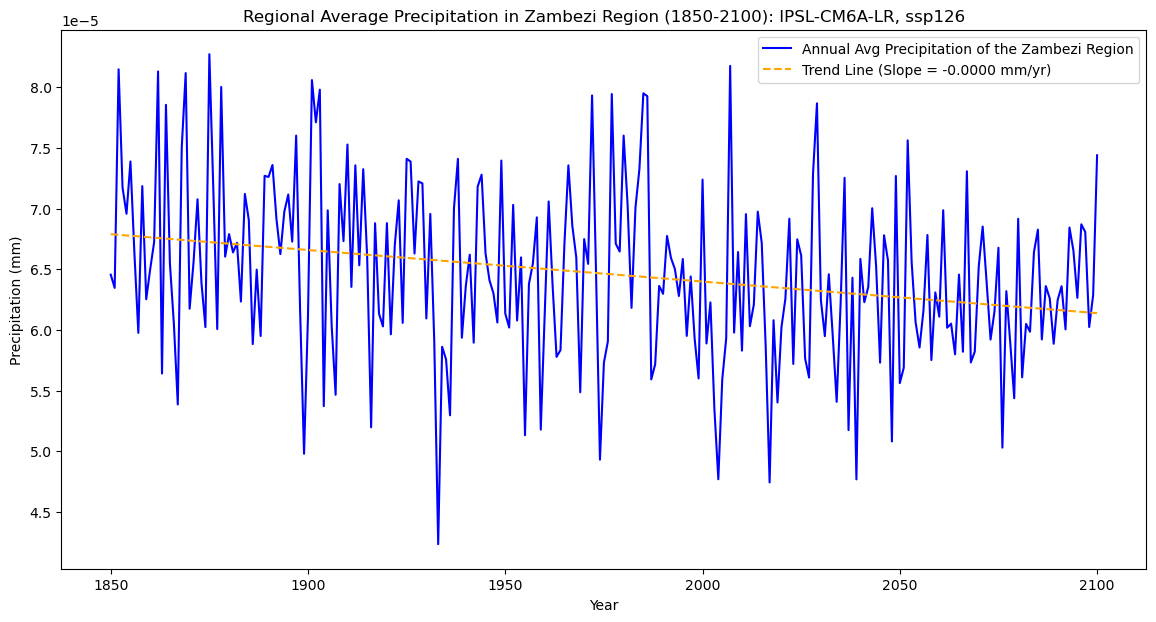

In [42]:
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(pr_ZAM_annual_avg_IP_ssp126.year, pr_ZAM_annual_avg_IP_ssp126.pr, 
        label= 'Annual Avg Precipitation of the Zambezi Region', color='blue')
ax.plot(pr_ZAM_annual_avg_IP_ssp126.year, trend_line_IP_ssp126(pr_ZAM_annual_avg_IP_ssp126.year), 
        color='orange', linestyle='--', label=f'Trend Line (Slope = {x_IP_ssp126[0]:.4f} mm/yr)')
ax.set_title('Regional Average Precipitation in Zambezi Region (1850-2100): IPSL-CM6A-LR, ssp126')
ax.set_xlabel('Year')
ax.set_ylabel('Precipitation (mm)')
ax.legend()
plt.show() 

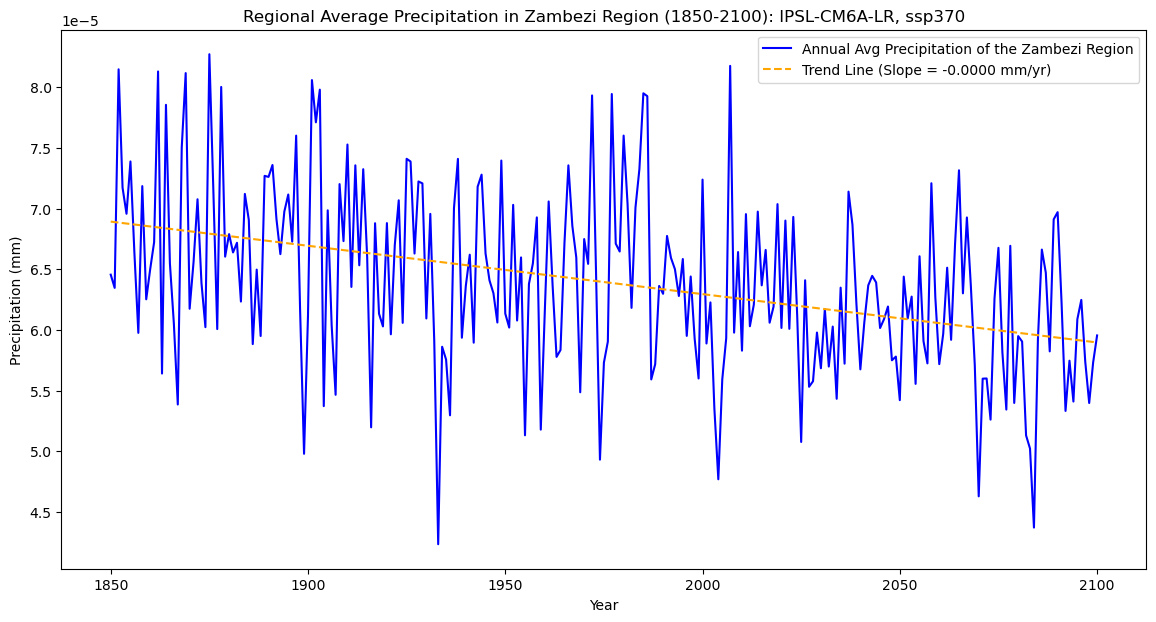

In [43]:
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(pr_ZAM_annual_avg_IP_ssp370.year, pr_ZAM_annual_avg_IP_ssp370.pr, 
        label= 'Annual Avg Precipitation of the Zambezi Region', color='blue')
ax.plot(pr_ZAM_annual_avg_IP_ssp370.year, trend_line_IP_ssp370(pr_ZAM_annual_avg_IP_ssp370.year), 
        color='orange', linestyle='--', label=f'Trend Line (Slope = {x_IP_ssp370[0]:.4f} mm/yr)')
ax.set_title('Regional Average Precipitation in Zambezi Region (1850-2100): IPSL-CM6A-LR, ssp370')
ax.set_xlabel('Year')
ax.set_ylabel('Precipitation (mm)')
ax.legend()
plt.show() 

# **5. Interpretation of Results**

**Plot Results:**<br> Looking at the time series plots in section 4 with trend lines included, precipitation has been declining in the Zambezi Region across the historical period (1850-2015) we looked at. This trend continues across future time periods (2015-2100) with data from the `GFDL-ESM4` and `IPSL-CM6A-LR` climate models under both `ssp126` and `ssp370` emission scenarios. There are significant annual and seasonal fluctuations in precipitation for the Zambezi Region, a characteristic trait of that area and its climate, and this trend continues into the future with an overall average decrease in rainfall. In both climate models, there appears to be less precipitation predicted under the `ssp370` emission scenario compared to `ssp126`. This is apparent looking at the plots in section 3 with both emission scenarios from each climate model plotted on top of eachother. 

**Impact on Humans & Ecosystems:**<br> A future decrease in precipitation will have adverse impacts on humans and ecosystems throuhgout the Zambezi Region. As the greater Zambezi Region experiences dryer conditions, farmers in rural areas are likley to see decreases in crop yields and suitable farm land. Streams and tributaries throughout the Zambezi River Basin will dry more frequently with decreased flow levels, negatively impacting surrounding communities and wildlife who depend on these key sources of water. As water availability becomes more constrained, this might also result in more frequent occurrences of human-wildlife conflict (HWC) throughout the Region as wildlife continue to expand their home ranges for subsistence needs. Projected decreases in precipitation might also increase health risks as less water overall is likely to decrease sanitation practices, making populations more suscepitable to disease and illness.  